In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file
sal=pd.read_csv("Salaries.csv")

In [3]:
#top 5 head of dataframe
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
#Use the .info() method to find out how many entries there are.
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
# the average BasePay:
print('The average BasePay is: ', sal['BasePay'].mean())

The average BasePay is:  66325.44884050643


In [8]:
print('The highest amount of BasePay is: ', sal['BasePay'].max())
print('The lowest amount of BasePay is: ', sal['BasePay'].min())

The highest amount of BasePay is:  319275.01
The lowest amount of BasePay is:  -166.01


In [14]:
print('The average amount of overtimePay is: ', sal['OvertimePay'].mean())
print('The highest amount of overtimePay is: ', sal['OvertimePay'].max())
print('The lowest amount of overtimePay is: ', sal['OvertimePay'].min())

The average amount of overtimePay is:  5066.059886444622
The highest amount of overtimePay is:  245131.88
The lowest amount of overtimePay is:  -0.01


In [16]:
# JOSEPH DRISCOLL's JobTitle
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [17]:
#GARY JIMENEZ's JobTitle
sal[sal['EmployeeName']=='GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [9]:
#How much does JOSEPH DRISCOLL make
t=sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits'] .values
print(t)
print('Mr JOSEPH DRISCOLL have earned a total of: ', t )

[270324.91]
Mr JOSEPH DRISCOLL have earned a total of:  [270324.91]


In [10]:
#What is the name of lowest paid person (including benefits)
ex=sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()][['EmployeeName', 'TotalPayBenefits']]

print("The name of lowest paid person: ", ex['EmployeeName'])
# sao làm nghề tư vấn lại âm tiền thế này, chắc là làm việc phi lợi nhuận

The name of lowest paid person:  148653    Joe Lopez
Name: EmployeeName, dtype: object


In [39]:
sal[sal['EmployeeName']=='Joe Lopez']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [42]:
f#What was the average (mean) BasePay of all employees per year? (2011-2014)
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [44]:
#unique JobTitle
sal['JobTitle'].unique()

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']


In [95]:
#what are the top 5 most common jobs?
sal['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [96]:
#How many Job Titles were represented by only one person in 2013
#Cách 1:
quanlity=0
for index, value in sal['JobTitle'].value_counts().items():
    if value==1:
        quanlity+=1
print(quanlity)

239


In [98]:
#cách 2:
t =sal['JobTitle'].value_counts()
c=0
for i, v in enumerate(t):
    if v==1:
        c+=1
print(c)

239


In [100]:
#How many people have the word Chief in their job title?
sal[sal['JobTitle'].str.contains('Chief')].count()

Id                  423
EmployeeName        423
JobTitle            423
BasePay             420
OvertimePay         423
OtherPay            423
Benefits            423
TotalPay            423
TotalPayBenefits    423
Year                423
Notes                 0
Agency              423
Status                0
dtype: int64

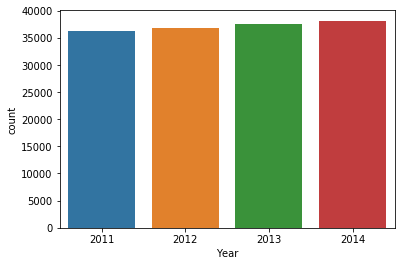

In [6]:
#data visualization

#Implement seaborn's countplot with x='Year'
sns.countplot(x='Year', data=sal, orient='v')

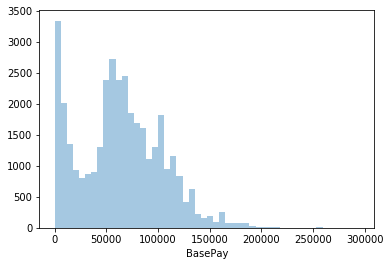

In [11]:
#Implement seaborn's distplot for BasePay of Year 2011
y11=sal[sal['Year']==2011]
sns.distplot(y11['BasePay'], hist=True,kde=False)

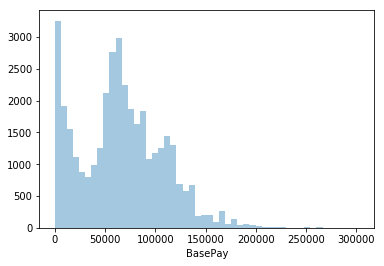

In [17]:
#another Year
y12=sal[sal['Year']==2012]
sns.distplot(y12['BasePay'],hist=True, kde=False)


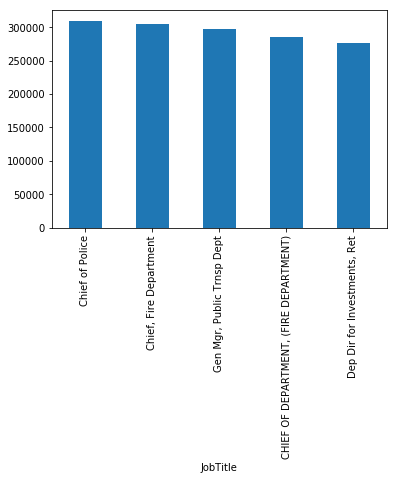

In [37]:
#Visualize top 5 Jobs with BasePay
sal.groupby('JobTitle').mean().sort_values(by='BasePay',ascending=False )['BasePay'].head().plot(kind='bar')


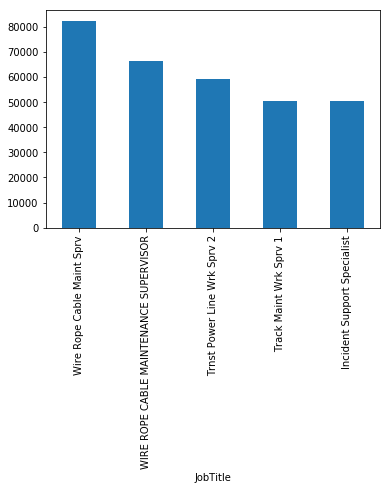

In [17]:
#Visualize top 5 Jobs with OvertimePay
sal.groupby('JobTitle').mean().sort_values(by='OvertimePay',ascending=False )['OvertimePay'].head().plot(kind='bar')

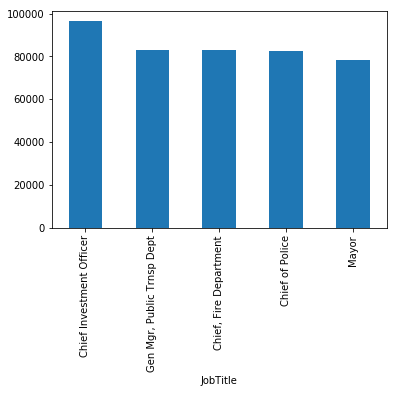

In [19]:
#Visualize top 5 Jobs with Benefits
sal.groupby('JobTitle').mean().sort_values(by='Benefits',ascending=False )['Benefits'].head().plot(kind='bar')

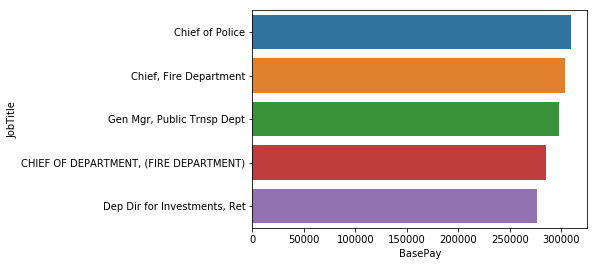

In [34]:
#cách khác để visualization
# tương tự cho OvertimePay và Benefits
d=sal.groupby('JobTitle').mean().sort_values(by='BasePay', ascending=False).head()
sns.barplot(x=d['BasePay'],y=d.index)

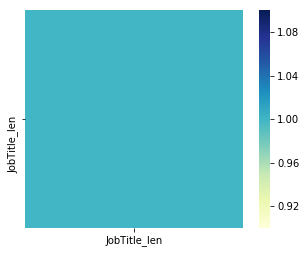

In [30]:
#correclation between length of job title and salary
sal['JobTitle_len']=sal['JobTitle'].str.len()
sal['JobTitle_len']
var=sal[['JobTitle','JobTitle_len']]
sns.heatmap(var.corr(),annot=False, fmt='.3f', cmap='YlGnBu', square=True)